In [1]:
from scipy import misc
from PIL import Image
from skimage import exposure
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import scipy
from math import sqrt,pi
from numpy import exp
import glob
import matplotlib.pyplot as pltss
from matplotlib import cm
import pandas as pd
from math import pi, sqrt
import pywt
import cv2
import numpy as np
import os
import csv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import entropy as scipy_entropy
from numpy import unique
import numpy
!pip install scipy==1.1.0

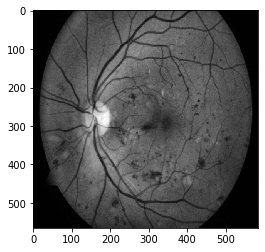

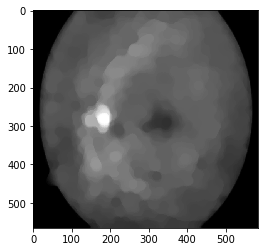

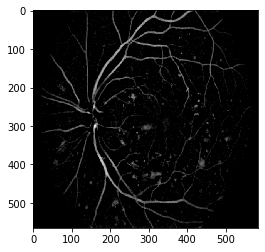

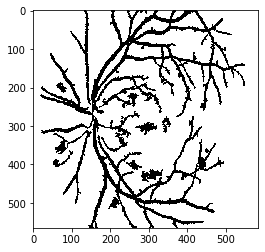

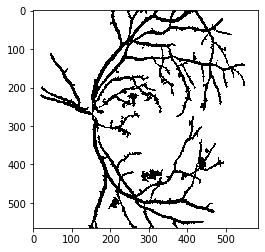

In [ ]:
from PIL import Image
def clahe(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_fundus = clahe.apply(green_fundus)
    return contrast_enhanced_green_fundus

def ASF(image):
    a=clahe(image)
    r1 = cv2.morphologyEx(a, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
    return R3

def substract(image):
    c=ASF(image)
    f4 = cv2.subtract(c,clahe(image))
    #f5 = clahe.apply(f4)
    return f4

def threshold(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    ff=substract(image)
    f5 = clahe.apply(ff)
    ret,f6 = cv2.threshold(f5,10,255,cv2.THRESH_BINARY)	
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255	
    contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)			
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,10,255,cv2.THRESH_BINARY_INV)			
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
    return newfin
    

def extract_bv(image):
    
    thres=threshold(image)
    
    fundus_eroded = cv2.bitwise_not(thres)	
    xmask = np.ones(fundus.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)   				
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "circle"	
        else:
            shape = "veins"
        if(shape=="circle"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)	
    
    finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
    blood_vessels = cv2.bitwise_not(finimage)
    blood_vessels = blood_vessels
    return blood_vessels

#fig,ax

if __name__ == "__main__":
    immatrix=[]
    pathFolder = "D:/dataset/train/new"
    filesArray = [x for x in os.listdir(pathFolder) if os.path.isfile(os.path.join(pathFolder,x))]
    destinationFolder = "D:/dataset/train/output"
    if not os.path.exists(destinationFolder):
        os.mkdir(destinationFolder)
    for file_name in filesArray:
        file_name_no_extension = os.path.splitext(file_name)[0]
        fundus = cv2.imread(pathFolder+'/'+file_name)
        fundus = numpy.array(Image.fromarray(fundus).resize((584,565)))
        
        bloodvessel = extract_bv(fundus)
        clah=clahe(fundus)
        asf=ASF(fundus)
        sub=substract(fundus)
        thresh=threshold(fundus)

        immatrix.append(np.array(bloodvessel).flatten())
    
    
    plt.imshow(clah,cmap="gray")
    plt.show()
    plt.imshow(asf,cmap="gray")
    plt.show()
    plt.imshow(sub,cmap="gray")
    plt.show()
    plt.imshow(thresh,cmap="gray")
    plt.show()
    plt.imshow(bloodvessel,cmap="gray")
    plt.show()
    

    
np.shape(immatrix)
np.shape(np.array(bloodvessel).flatten())

imm_new = []
for equ2 in immatrix:
    equ2 = equ2.reshape((584,565))
    imm_new.append(np.array(equ2).flatten())
np.shape(imm_new)


    
    

In [3]:
def shannon_entropy(image, base=2):
    counts = unique(image, return_counts=True)
    return scipy_entropy(counts, base=base)


In [4]:
entropy = []
for i in range (0,100):
    entropy.append(shannon_entropy(imm_new[i]))
entropy


[array([0.        , 0.01052415]),
 array([0.        , 0.01075766]),
 array([0.        , 0.01043332]),
 array([0.        , 0.01058115]),
 array([0.        , 0.01074501]),
 array([0.        , 0.01060211]),
 array([0.        , 0.01075686]),
 array([0.       , 0.0103136]),
 array([0.        , 0.01039433]),
 array([0.        , 0.01063187]),
 array([0.        , 0.01048872]),
 array([0.        , 0.01079026]),
 array([0.        , 0.01060107]),
 array([0.        , 0.00911928]),
 array([0.        , 0.01043012]),
 array([0.        , 0.01030443]),
 array([0.        , 0.01043416]),
 array([0.        , 0.01048663]),
 array([0.        , 0.00913191]),
 array([0.        , 0.01060211]),
 array([0.        , 0.01059095]),
 array([0.        , 0.01069529]),
 array([0.        , 0.01075766]),
 array([0.       , 0.0100931]),
 array([0.        , 0.00997261]),
 array([0.        , 0.01060275]),
 array([0.        , 0.01060495]),
 array([0.        , 0.01094321]),
 array([0.        , 0.00911234]),
 array([0.00909744

In [5]:
imm_kmean = []
for equ2 in imm_new:
    img = equ2.reshape((584,565))
    b=np.zeros((584,2))
    img=np.hstack((img,b))
    
    Z = img.reshape((-1,3))

    Z = np.float32(Z)

    k=cv2.KMEANS_PP_CENTERS

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,k)

    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    imm_kmean.append(np.array(res2).flatten())

    

In [6]:
len(imm_kmean)

3908

In [7]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("D:/dataset/train/label.csv")
Y = df
#Y[Y < 4] = 0

print(Y)
x_train, x_test, y_train, y_test = train_test_split(imm_kmean[0:3908], Y, test_size=0.2)

      Retinopathy grade
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
3903                  1
3904                  1
3905                  1
3906                  1
3907                  1

[3908 rows x 1 columns]


In [8]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(x_train, y_train)

C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

0.7979539641943734

In [10]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,y_pred)
print(a)

[[240 152]
 [  6 384]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for KNN\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_knn = tn+fp+fn+tp
#print(total_cm)

accuracy_knn = (tp+tn)/total_cm_knn
print("Accuracy KNN\n")
print(accuracy_knn)
print()

recall_knn = tp/(tp+fn)
print("Recall KNN\n")
print(recall_knn)
print()

precision_knn = tp/(tp+fp)
print("Precision KNN\n")
print(precision_knn)
print()


C:\Users\Arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix for KNN

[[376  16]
 [127 263]]

Accuracy KNN

0.8171355498721228

Recall KNN

0.6743589743589744

Precision KNN

0.942652329749104



In [12]:
from sklearn.ensemble import RandomForestClassifier
neigh = RandomForestClassifier()
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for RF\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_rm = tn+fp+fn+tp
#print(total_cm)

accuracy_rm = (tp+tn)/total_cm_rm
print("Accuracy RF\n")
print(accuracy_rm)
print()

recall_rm = tp/(tp+fn)
print("Recall RF\n")
print(recall_rm)
print()

precision_rm = tp/(tp+fp)
print("Precision RF\n")
print(precision_rm)
print()

C:\Users\Arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix for RF

[[386   6]
 [ 21 369]]

Accuracy RF

0.9654731457800512

Recall RF

0.9461538461538461

Precision RF

0.984



In [13]:
from sklearn.naive_bayes import GaussianNB
neigh = GaussianNB()
neigh.fit(x_train, y_train)
#neigh.score(imm_kmean,Y)
y_pred = neigh.predict(x_test)
a=confusion_matrix(y_test,y_pred)

print("Confusion Matrix for NB\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_nb = tn+fp+fn+tp
#print(total_cm)

accuracy_nb = (tp+tn)/total_cm_nb
print("Accuracy NB\n")
print(accuracy_nb)
print()

recall_nb = tp/(tp+fn)
print("Recall NB\n")
print(recall_nb)
print()

precision_nb = tp/(tp+fp)
print("Precision NB\n")
print(precision_nb)
print()


C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for NB

[[319  73]
 [  1 389]]

Accuracy NB

0.9053708439897699

Recall NB

0.9974358974358974

Precision NB

0.841991341991342



In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)

#neigh.score(imm_kmean,Y)
y_pred = clf.predict(x_test)

a=confusion_matrix(y_test,y_pred)


print("Confusion Matrix for Logistic Regression\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_lr = tn+fp+fn+tp
#print(total_cm)

accuracy_lr = (tp+tn)/total_cm_lr
print("Accuracy LR\n")
print(accuracy_lr)
print()

recall_lr = tp/(tp+fn)
print("Recall LR\n")
print(recall_lr)
print()

precision_lr = tp/(tp+fp)
print("Precision LR\n")
print(precision_lr)
print()



C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix for Logistic Regression

[[390   2]
 [ 15 375]]

Accuracy LR

0.9782608695652174

Recall LR

0.9615384615384616

Precision LR

0.9946949602122016



In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)

#neigh.score(imm_kmean,Y)
y_pred = clf.predict(x_test)

a=confusion_matrix(y_test,y_pred)


print("Confusion Matrix for Logistic Regression\n")
print(a)
print()

tn = a[0][0]
fp = a[0][1]
fn = a[1][0]
tp = a[1][1]

total_cm_lr = tn+fp+fn+tp
#print(total_cm)

accuracy_lr = (tp+tn)/total_cm_lr
print("Accuracy LR\n")
print(accuracy_lr)
print()

recall_lr = tp/(tp+fn)
print("Recall LR\n")
print(recall_lr)
print()

precision_lr = tp/(tp+fp)
print("Precision LR\n")
print(precision_lr)
print()




C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion Matrix for Logistic Regression

[[390   2]
 [ 15 375]]

Accuracy LR

0.9782608695652174

Recall LR

0.9615384615384616

Precision LR

0.9946949602122016

